In [1]:
import tinvest as ti
import datetime
import numpy as np
token = "..."
a = ti.SyncClient(token)

In [2]:
#!pip install tinvest

In [3]:
b = ti.AsyncClient(token)

In [ ]:
c

In [5]:
a = ti.SyncClient(token)

In [52]:
a.get_portfolio_currencies()

PortfolioCurrenciesResponse(payload=Currencies(currencies=[CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.eur: 'EUR'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.cny: 'CNY'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.chf: 'CHF'>), CurrencyPosition(balance=Decimal('172.63'), blocked=Decimal('0'), currency=<Currency.rub: 'RUB'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.gbp: 'GBP'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.try_: 'TRY'>), CurrencyPosition(balance=Decimal('0.07'), blocked=None, currency=<Currency.usd: 'USD'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.jpy: 'JPY'>), CurrencyPosition(balance=Decimal('0'), blocked=None, currency=<Currency.hkd: 'HKD'>)]), status='Ok', tracking_id='d8f0c787c7016e6f')

In [4]:
import matplotlib.pyplot as plt
import time
f1=a.get_market_orderbook("BBG004731354",300)
print(len(f1.payload.bids))
print(f1.payload.bids[3])

50
price=Decimal('475.85') quantity=82


In [55]:
for j in range(5):
    f1=a.get_market_orderbook("BBG004731354",300)
    max_bids=0;max_asks=0
    summ_bids = 0;summ_asks= 0
    pr_bids = 0; pr_asks = 0
    for i in range(len(f1.payload.bids)):
        newb = int(f1.payload.bids[i].quantity)
        newas = int(f1.payload.asks[i].quantity)
        summ_bids+=newb
        summ_asks+=newas
        if newb>max_bids:
            max_bids = newb
            pr_bids = int(f1.payload.bids[i].price)
        if newas>max_asks:
            max_asks = newas
            pr_asks = int(f1.payload.asks[i].price)
    print('max bids-', max_bids,'||| price bids',pr_bids,'||| summ bids-', summ_bids, '\nmax asks-', max_asks,'||| price bids-',pr_asks, '||| summ asks-', summ_asks)
    time.sleep(10)

max bids- 4927 ||| price bids 457 ||| summ bids- 26511 
max asks- 6841 ||| price bids- 461 ||| summ asks- 44398
max bids- 4927 ||| price bids 457 ||| summ bids- 26608 
max asks- 6841 ||| price bids- 461 ||| summ asks- 44461
max bids- 4927 ||| price bids 457 ||| summ bids- 26512 
max asks- 6841 ||| price bids- 461 ||| summ asks- 44573
max bids- 4927 ||| price bids 457 ||| summ bids- 26573 
max asks- 6841 ||| price bids- 461 ||| summ asks- 44568
max bids- 4927 ||| price bids 457 ||| summ bids- 26745 
max asks- 8576 ||| price bids- 461 ||| summ asks- 44570


In [56]:
len(f1.payload.bids)

50

461.0

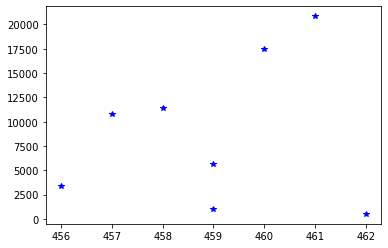

In [57]:
X = np.array([]); Y = np.array([])
f1=a.get_market_orderbook("BBG004731354",500)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price))
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price))
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))

plt.plot(X, Y, "*b")
X[np.argmax(Y)]

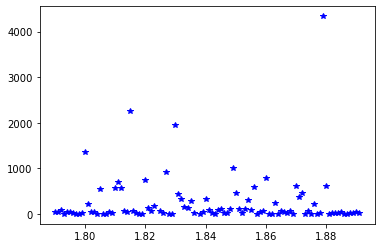

In [58]:
figi_new = a.get_market_search_by_ticker("UPRO").payload.instruments[0].figi
X = np.array([]); Y = np.array([])
f1=a.get_market_orderbook(figi_new,100)
for i in range(0, len(f1.payload.bids)):
    X = np.append(X, float(f1.payload.bids[i].price))
    X = np.append(X, float(f1.payload.asks[i].price))
    Y = np.append(Y, int(f1.payload.bids[i].quantity))
    Y = np.append(Y, int(f1.payload.asks[i].quantity))
plt.plot(X, (Y), "*b")

Заявки с шагом в 5 руб в Соллерсе

188.0

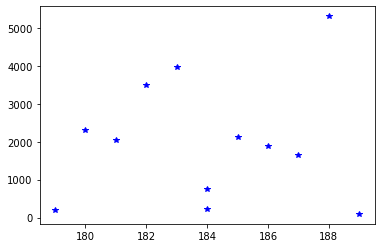

In [59]:
X = np.array([]); Y = np.array([])
figi_new = a.get_market_search_by_ticker("UPRO").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,500)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price)*100)
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price)*100)
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))

plt.plot(X, Y, "*b")
X[np.argmax(Y)]

241.15 241.18


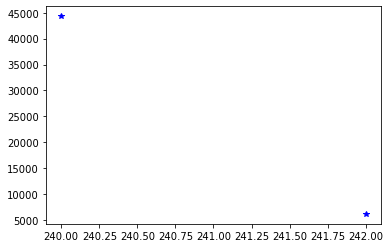

In [60]:
X = np.array([]); Y = np.array([])
figi_new = a.get_market_search_by_ticker("SBER").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,300)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price))//2*2
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price))//2*2
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))

plt.plot(X, Y, "*b")
X[np.argmax(Y)]
a.get_market_search_by_ticker("GAZP")
print(f1.payload.bids[0].price, f1.payload.asks[0].price)

In [61]:
a.get_market_search_by_ticker("SNGS")
print(f1.payload.bids[0].price)
print(f1.payload.asks[0].price)

241.15
241.18


In [7]:
for i in range(30):
    figi_new = a.get_market_search_by_ticker("NGV1").payload.instruments[0].figi
    f1=a.get_market_orderbook(figi_new,100)
    print(f1.payload.bids[0].price, f1.payload.asks[0].price, end = '\r')
    time.sleep(10)

IndexError: list index out of range

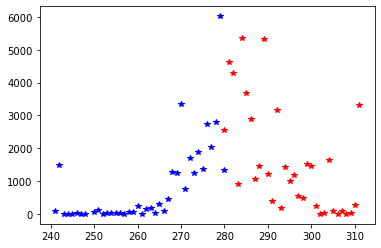

In [28]:
X1 = np.array([]); Y1 = np.array([])
figi_new = a.get_market_search_by_ticker("UPRO").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,500)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price)*100)
    if len(X1)==0:
        X1 =np.append(X1, new_price)
        Y1 = np.append(Y1, int(f1.payload.bids[i].quantity))
    elif X1[len(X1)-1]== new_price:
        Y1[len(Y1)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X1 = np.append(X1, new_price)
        Y1 = np.append(Y1, int(f1.payload.bids[i].quantity))
X2 = np.array([]); Y2 = np.array([])
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price)*100)
    if len(X2)==0:
        X2 =np.append(X2, new_price)
        Y2 = np.append(Y2, int(f1.payload.asks[i].quantity))
    elif X2[len(X2)-1]== new_price:
        Y2[len(Y2)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X2 = np.append(X2, new_price)
        Y2 = np.append(Y2, int(f1.payload.asks[i].quantity))
plt.plot(X1, Y1, "*b", X2, Y2, '*r' )

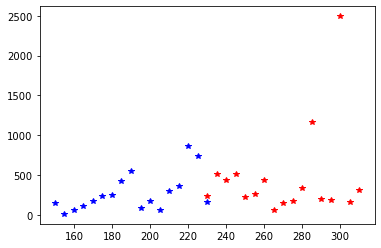

In [42]:
X1 = np.array([]); Y1 = np.array([])
figi_new = a.get_market_search_by_ticker("SVAV").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,1000)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price))//5*5
    if len(X1)==0:
        X1 =np.append(X1, new_price)
        Y1 = np.append(Y1, int(f1.payload.bids[i].quantity))
    elif X1[len(X1)-1]== new_price:
        Y1[len(Y1)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X1 = np.append(X1, new_price)
        Y1 = np.append(Y1, int(f1.payload.bids[i].quantity))
X2 = np.array([]); Y2 = np.array([])
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price))//5*5
    if len(X2)==0:
        X2 =np.append(X2, new_price)
        Y2 = np.append(Y2, int(f1.payload.asks[i].quantity))
    elif X2[len(X2)-1]== new_price:
        Y2[len(Y2)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X2 = np.append(X2, new_price)
        Y2 = np.append(Y2, int(f1.payload.asks[i].quantity))
plt.plot(X1, Y1, "*b", X2, Y2, '*r' )

In [43]:
print(X2[np.argmax(Y2)])
print(Y2[np.argmax(Y2)])


300.0
2495.0


In [67]:
a.get_market_search_by_ticker("SBER")

MarketInstrumentListResponse(payload=MarketInstrumentList(instruments=[MarketInstrument(currency=<Currency.rub: 'RUB'>, figi='BBG004730N88', isin='RU0009029540', lot=10, min_price_increment=Decimal('0.01'), name='Сбер Банк', ticker='SBER', type=<InstrumentType.stock: 'Stock'>, min_quantity=None)], total=Decimal('1')), status='Ok', tracking_id='28c078bfa7599db6')

In [69]:
figi_sber = "BBG004730N88"

241.13 241.19


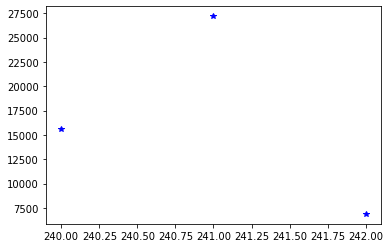

In [70]:
X = np.array([]); Y = np.array([])
figi_new = a.get_market_search_by_ticker("SBER").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,300)
for i in range(len(f1.payload.bids)):
    new_price = round(float(f1.payload.bids[i].price))
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.bids[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.bids[i].quantity))
for i in range(len(f1.payload.asks)):
    new_price = round(float(f1.payload.asks[i].price))//2*2
    if len(X)==0:
        X =np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))
    elif X[len(X)-1]== new_price:
        Y[len(Y)-1]+=int(f1.payload.asks[i].quantity)
    else:
        X = np.append(X, new_price)
        Y = np.append(Y, int(f1.payload.asks[i].quantity))

plt.plot(X, Y, "*b")
X[np.argmax(Y)]
a.get_market_search_by_ticker("GAZP")
print(f1.payload.bids[0].price, f1.payload.asks[0].price)

In [83]:
figi_new = a.get_market_search_by_ticker("VTBR").payload.instruments[0].figi
f1=a.get_market_orderbook(figi_new,500)

In [84]:
len(f1.payload.bids)

50